In [93]:
import random
import numpy as np
class KMeans:
    def __init__(self,n_cluster=2, max_iter=100):
        self.n_cluster=n_cluster
        self.max_iter=max_iter
        self.centriods=None
        
    def fit_predict(self,X):
        random_centriods = random.sample(range(0,X.shape[0]),self.n_cluster)
        self.centriods = X[random_centriods]
        for i in range(self.max_iter):
            # Assign cluster for each point in Dataset
            cluster_group = self.assign_cluster(X)
          
            old_centriods = self.centriods
            self.centriods = self.move_centriod(X, cluster_group)
            if(old_centriods == self.centriods).all():
                break;
        return cluster_group
            

    def assign_cluster(self, X):
        cluster_group=[]
        distances=[]
        for row in X:
            for centriod in self.centriods:
                distances.append(np.sqrt(np.dot(row - centriod, row - centriod)))
            min_distance = min(distances)
            index = distances.index(min_distance)
            distances.clear()
            cluster_group.append(index)
        return np.array(cluster_group)

    def move_centriod(self, X, cluster_group):
        new_centriods=[]
        cluster_type= np.unique(cluster_group)
        for type in cluster_type:
            new_centriods.append(X[cluster_group==type].mean(axis=0))
        return np.array(new_centriods)
        

In [94]:
# running the code over here
import pandas as pd
df = pd.read_csv("student_clustering.csv")
X=df.iloc[:,:].values
km = KMeans(n_cluster=4,max_iter=500)
y_means = km.fit_predict(X)

In [90]:
y_means

array([0, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 0, 0, 2, 0, 3, 2, 1, 3, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 2, 2, 0,
       3, 3, 2, 1, 3, 1, 0, 0, 3, 2, 3, 1, 1, 3, 1, 3, 1, 2, 2, 3, 0, 3,
       2, 0, 1, 2, 1, 3, 2, 0, 1, 3, 1, 3, 0, 2, 2, 3, 1, 0, 3, 0, 3, 1,
       3, 1, 3, 3, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 3, 0, 0, 2, 0, 3, 3,
       2, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 1, 2, 3, 2, 0, 2, 1, 0, 2, 2, 1,
       0, 0, 1, 3, 1, 0, 2, 2, 2, 0, 1, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3,
       0, 2, 1, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 2,
       3, 1, 0, 3, 3, 1, 1, 1, 2, 0, 2, 2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 1,
       1, 3])

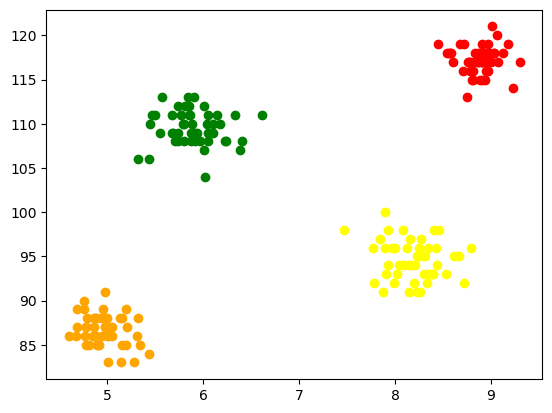

In [92]:
import matplotlib.pyplot as plt
plt.scatter(X[y_means==0,0],X[y_means==0,1],color="orange")
plt.scatter(X[y_means==1,0],X[y_means==1,1],color="green")
plt.scatter(X[y_means==2,0],X[y_means==2,1],color="yellow")
plt.scatter(X[y_means==3,0],X[y_means==3,1],color="red")